# Chapter 12: Other Data Science Tasks and Techniques
## Fundamental concepts
The importance of at least basic understanding of foundation of data science

## Exemplary techniques
* [Association and Co-occurences](#association)
* [Behavioral Profiling](#behavioral)
* [Data Reduction](#datareduction)
* [Movie Recommendations](#movierec)
* [Ensembles of Models](#ensembles)

## Association and Co-occurences <a name="association"></a>
_Co-occurence grouping_ or _association discovery_: Finding associations between entities based on transactions involving them

Co-occurence grouping can be used in many applications such as cross-selling, regional distribution center stocking, and music preferences.  

**Where at work could association discovery be useful?**

If the task of finding co-occurences is viewed as a rule, such as "if an eWatch is bought, an e-bracelet is more likely to be sold", we can model this with probability: P(an e-bracelet is bought|an eWatch is bought).

In association mining P(A|B) is referred to as the strength of the rule.

**What measure can be used as a weak measure of surprising associations?**

$\frac{P(A,B)}{P(A)P(B)}$, when $\frac{P(A,B)}{P(A)P(B)}$ > 1 we say seeing A boosts the likelihood of seeing B

$Leverage(A,B) = P(B,A) - P(A)P(B)$

Lift may find very strong associations for less frequent items, while leverage tends to prioritize items with higher frequencies/support in the dataset.

** What is support? **

Convenience stored example:
Suppose $P(buying beer) = 0.3, P(buying lottery tickets) = 0.4, and P(buying beeer, lottery tickets) = 0.2$, is this an interesting co-occurence or simply chance?

Association rule: Customers who buy beer are also likely to buy lottery tickets

If beer is independent of lottery tickets then $P(buying beer) x P(buying lottery tickets) = 0.12$
$Lift(buying beer, buying lottery tickets) = \frac{0.2}{0.12} = 1.67, or 1.67$ times more likely for lottery tickets and beer to be bought together.
$Leverage(buying beer, buying lottery tickets) = 0.2 - 0.12 = 0.08.$

## Behavioral Profiling <a name="behavioral"></a>
_Profiling_ attempts to characterize typical behavior of individuals, groups, or populations.

Example profiling questions:
* What is the typical credit card usage of this customer segment?
* What are the normal wait times of a customer on hold?
* What level of sales interaction do customers that buy large volumes of enterprise grade SSD's have?

**At work, what other profiling questions would be useful to answer?**

In trying to answer the question what are the normal wait times of a customer on hold you may start with a mean and standard deviation.  In doing so you are making assumptions about the distribution of the data, that is you are assuming that customer wait times are normally distributed. 

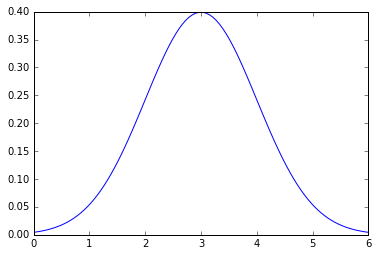

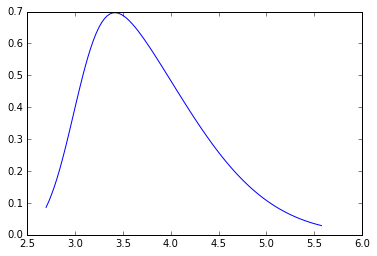

In [12]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skewnorm
import matplotlib.mlab as mlab
import math

mu = 3.0
sigma = 1
x = np.linspace(0, 6, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma))

plt.show()

x = np.linspace(skewnorm.ppf(0.01, 4, 3), skewnorm.ppf(0.99, 4, 3), 100)
plt.plot(x, skewnorm.pdf(x, 4, 3))
plt.show()

## Data Reduction<a name="datareduction"></a>
If A is an nxn matrix and v is an nx1 vector, $Av = \lambda v$ means that v is an eigenvector of A with eigenvalue $\lambda$. 

Given this background principle component analysis (PCA) does an eigenvector decomposition of A, ordering the eigenvectors by maximum variance.  The general idea being with a large feature dataset most of the variablity of the data can be explained with a smaller number of eigenvectors than features in the original dataset.

Independent component anaylsis is another dimensionality reduction algorithm that aims to find independent components (or latent factors) within a dataset by maximizing independence of estimated components.  

The following example uses PCA to reduce the dimensions of a dataset before using it to build a logistic regression model, example adapted from http://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html#sphx-glr-auto-examples-decomposition-plot-faces-decomposition-py

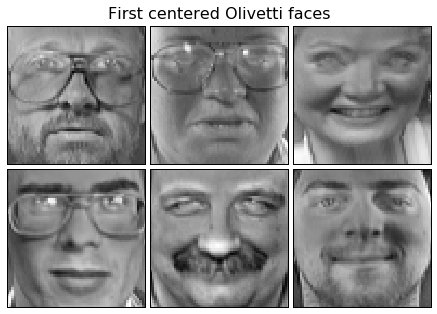

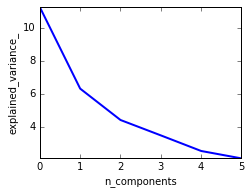

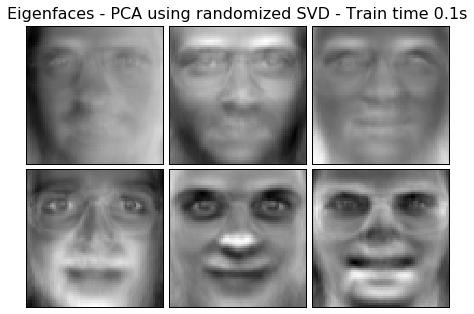

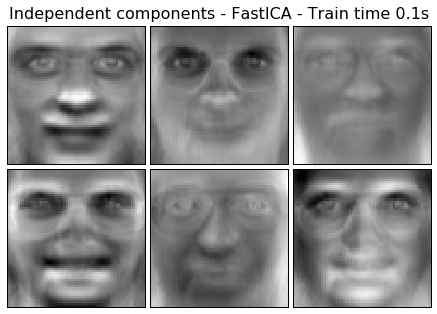

In [16]:
% matplotlib inline
# Authors: Vlad Niculae, Alexandre Gramfort
# License: BSD 3 clause
from time import time

from numpy.random import RandomState
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.cluster import MiniBatchKMeans
from sklearn import decomposition

n_row, n_col = 2, 3
n_components = n_row * n_col
image_shape = (64, 64)
rng = RandomState(0)
dataset = fetch_olivetti_faces(shuffle=True, random_state=rng)
faces = dataset.data

n_samples, n_features = faces.shape

# global centering
faces_centered = faces - faces.mean(axis=0)

# local centering
faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

def plot_gallery(title, images, n_col=n_col, n_row=n_row):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)
    
estimators = [
    ('Eigenfaces - PCA using randomized SVD',
     decomposition.PCA(n_components=n_components, svd_solver='randomized',
                       whiten=True),
     True), ('Independent components - FastICA',
     decomposition.FastICA(n_components=n_components, whiten=True),
     True)]

plot_gallery("First centered Olivetti faces", faces_centered[:n_components])
plt.show()
for name, estimator, center in estimators:
    t0 = time()
    data = faces
    if center:
        data = faces_centered
    estimator.fit(data)
    train_time = (time() - t0)
    components_ = estimator.components_
    if hasattr(estimator, 'explained_variance_'):
        plt.figure(1, figsize=(4, 3))
        plt.clf()
        plt.axes([.2, .2, .7, .7])
        plt.plot(estimator.explained_variance_, linewidth=2)
        plt.axis('tight')
        plt.xlabel('n_components')
        plt.ylabel('explained_variance_')
    
    plot_gallery('%s - Train time %.1fs' % (name, train_time),
                 components_[:n_components])

plt.show()

## Movie Recommendations <a name="movierec"></a>
The Netflix prize offered  1 million dollars for the algorithm that was best able to predict user ratings for films, based only off of previous ratings.  In order to win the algorithm had to improve Netflix's own rating predictions by at least 10%.  The competition opened on October 2nd, 2006 and did not close until September of 2009.  Each year the team that held the lead for most improvement over the Netflix algorithm was awarded 50k.  The winning algorithm used matrix factorization, another way of representing input data as latent factors, with temporal dynamics and ensemble methods.  

**The winning algorithm used many complex techniques to produce a model, but whatelse contributed to their success?**

Papers on the winning algorithm: 

http://www.columbia.edu/~jwp2128/Teaching/W4721/papers/ieeecomputer.pdf

http://www.netflixprize.com/assets/GrandPrize2009_BPC_BellKor.pdf


## Ensembles of Models<a name="ensembles"></a>
Ensemble methods aim to combine many different models to form a consensus, depending on the type of problem this would be either a vote or an average.  Ensemble methods can combine different types of models or just focus on one model trained on different subsets of data.  

Perfect Random Trees: 
Perfect random treeâ€™s are created by randomly selecting the feature to split on at each non-terminal node and additionally choosing the value to split on at each node randomly. As you can imagine perfect random trees do not tend to produce great models overall.  As such they are a perfect example of how ensemble methods can be used to improve poor models.  

Bagging (or bootstrap aggregating):
Bagging uses random sampling with replacement to train m different models of the same type, combining the results with an average.  


Adaboost:
Adaboost uses random sampling with replacement to iteratively train different models of the same type, but at each step the samples that the model had the highest errors on are given an increased weight.  The results of each model are then combined as a weighted average or vote.  Adaboost with decision trees are sometimes referred to as the best out of the box classifier, though like many other methods it can be susceptible to noisy data and outliers.

Example results using bagging with random tree learners:

|Learner|Training RMSE|Test RMSE|
| ------------- |:-------------:| -----:|
|Random Tree|0|1.01|
|Bagging|0.252|0.721|